### Setup
Before we start, we will be importing the **NumPY** package to explore constructing and manipulating vectors and vector data.

In [1]:
import numpy as np #import NumPy and declare it using an alias

## 1.1 Vectors

Vectors are essentially ordered list structures in Python. *(VMLS, p.3)*

#### List/Vector Basics

You can initialize a list with values separated by commas.

In [2]:
x = [-1.1, 0.0, 3.6, -7.2]   # a list of floats
                             # remember to separate by commas, or you will encounter a SyntaxError

# List all elements of a list by calling the name of the list:

x

[-1.1, 0.0, 3.6, -7.2]

You can find the length of a vector with the **len()** function. *(VMLS Companion, p.2)*

In [3]:
len(x)

4

A more specific way to represent vectors, particularly for use with **NumPy** is to initialize a *numpy array*.

The advantage to initializing as a *numpy array* is the ability to use methods and functions within the NumPy library on this vector as well as ordinary list syntax and methods.

In [4]:
#import numpy as np
x = np.array([-1.1, 0.0, 3.6, -7.2])
print(x)
print(len(x))

[-1.1  0.   3.6 -7.2]
4


#### Indexing

You can access elements within the vector the same way you would a regular list.
However, keep in mind that lists/arrays are 0-indexed! 
*(VMLS Companion, p.3)*

Also, notice that numpy arrays do not output with commas separating its values, as traditional vectors are written this way:

In [5]:
y = [1, 2, 3, 4, 5]
z = np.array([1, 2, 3, 4, 5])

print(y) # comma separated values
print(z, "\n") # a traditional vector

print(y[0]) # accesses and prints the 0th index/1st element
print(z[0], "\n")

z[4] = 99 # accesses the 4th index/5th element in the array, changes it to 99
print(z)
y[-1] = 42 # accesses the last element, negative indices count backwards from the last element to the front/first element
print(y)

[1, 2, 3, 4, 5]
[1 2 3 4 5] 

1
1 

[ 1  2  3  4 99]
[1, 2, 3, 4, 42]


#### Assignment versus copying

Setting a new variable equal to an existing array does not create a copy of it. 
*(VMLS Companion, p.3-4)*

To create a copy of an array, use the **copy()** method.

In [6]:
x = np.array([-1.1,0.0,3.6,-7.2])

y = x # Assignment is not the same as copying
x[2] = 20.0
print(x)
print(y)

[-1.1  0.  20.  -7.2]
[-1.1  0.  20.  -7.2]


In [7]:
x = np.array([-1.1,0.0,3.6,-7.2])

y = x.copy() # Copies the contents of the array x to y
x[2] = 20.0
print(x)
print(y)

# or

x, y

[-1.1  0.  20.  -7.2]
[-1.1  0.   3.6 -7.2]


(array([-1.1,  0. , 20. , -7.2]), array([-1.1,  0. ,  3.6, -7.2]))

#### Vector Equality

You can check the equality of two vectors using the relational operator **==**

Here four evaluations (True or False) are shown because applying relational operator on **numpy array** performs element-wise comparison.  *(VMLS Companion, p.4)*

In other words, every *i*th element of one vector is compared to the *i*th element of the other.

In [8]:
x = np.array([-1.1,0.0,3.6,-7.2])
y = x.copy()
y[2] = 4.0
y==x 

array([ True,  True, False,  True])

In [9]:
z=x.copy()
z[1] = 4.0
x[1] = 4.0
y == x, z == x

(array([ True, False, False,  True]), array([ True,  True,  True,  True]))

However, if we apply the relational operator on list structures, the Python expression evaluates to True only when both
sides have the same length and identical entries.

In [10]:
x = [-1.1, 0.0, 3.6, -7.2] 
y = x.copy()
x == y

True

In [11]:
x = [-1.1, 0.0, 3.6, -7.2] 
y = x.copy() 
y[3] = 9.0
x == y

False

#### Scalars versus 1-vectors

In the VMLS text, 1-vectors are considered scalars. However, in Python notation, these are not the same. *(VMLS Companion, p. 5)*

In [12]:
x = 2.4 
y = [2.4]
x == y

False

In [13]:
print(type(x))
print(type(y))

<class 'float'>
<class 'list'>


However, this works if we specify it as a NumPy array.

In [14]:
x = 2.4 
y = np.array([2.4])
x == y

array([ True])

#### Block and stacked vectors

In Python, we can construct a block vector using the numpy function **concatenate()**. 
*(VMLS Companion, p.6)*

The syntax requires an extra set of parentheses, think of this as inserting a tuple of arrays.
It does not matter whether you use list structure or NumPy array, here.

In [15]:
x = [1, -2]
y = np.array([1,1,0]) 
z = np.concatenate((x,y)) # concatenates in order from left to right.
print(z, "\n")

[ 1 -2  1  1  0] 



A common mistake in Python operations is to try constructing stack vectors using tuple and list syntax incorrectly.

In [16]:
z = [x, y]
z # This method creates a list of a list and a numpy array, and is NOT a stacked vector

[[1, -2], array([1, 1, 0])]

In [17]:
z = (x, y)
z # This method creates a tuple of a list and a numpy array, and it NOT a stacked vector

([1, -2], array([1, 1, 0]))

#### Subvectors and slicing

In VMLS, since we index elements in a vector starting at 1, slicing is more readable to the user, but keep in mind that programming arrays, Python lists and NumPy arrays included, are zero-indexed. 

*(VMLS, p.4)(VMLS Companion, p.6)*

In [18]:
x = np.array([1,8,3,2,1,9,7]) 
y = x[1:4] # In VMLS, this would be denoted as x_2:4
print(y)

x[3:6] = [100, 200, 300] # You can also reassign elements using a list
print(x)
print(y) # Remember, assignment is not the same as copying

[8 3 2]
[  1   8   3 100 200 300   7]
[  8   3 100]


#### Vector of First Differences

We use slicing to create an *(n-1)*-vector *d* which is defined as the first difference vector. 

d[i] = x[i+1] − x[i], for i = 1, . . . , n − 1

*(VMLS Companion, p.7)*

In [19]:
#d = x[2:end] - x[1:end-1]; which gives the vector of differences 

x = np.array([1,8,3,2,1,9,7]) 
d = x[1:] - x[:-1]
print(d)

# You can also use a list comprehension
y = x.copy()
print(np.array([y[i+1]-y[i] for i in range(len(y)-1)]))

[ 7 -5 -1 -1  8 -2]
[ 7 -5 -1 -1  8 -2]


#### Zero vectors

We can use the NumPy method "**np.zeros(n)**" to create an *n* vector filled with zeros.

A **zero vector** is a vector with all elements equal to zero. *(VMLS, p.5)*

In [20]:
zero = np.zeros(3)
zero

array([0., 0., 0.])

#### Ones vector

We can use the NumPy method "**np.ones(n)**" to create an *n* vector filled with ones.

A **ones vector** is a vector with all elements equal to one. *(VMLS, p.6)*

In [21]:
ones = np.ones(3)
ones

array([1., 1., 1.])

#### Random vectors

We can generate random vectors as well. *(VMLS Companion, p.9)*

In [22]:
np.random.random(2)

array([0.28954959, 0.79362835])

#### Unit Vectors

We can create *ei*, the *i*th unit vector of length *n* using index.

A **unit vector** is a vector in which all elements equal zero, except for one element that is equal to one. *(VMLS, p.5)*

This *i*th unit vector has a one at the *i*th element, and is denoted as *ei*

In [23]:
i = 2 
n = 4 
x = np.zeros(n)
x[i] = 1
print(x)

[0. 0. 1. 0.]


## Plotting

Plenty of Python libraries allow the ability to create plots from vectors.

**matplotlib** is one such library, and we really only need the **pyplot** method. *(VMLS Companion, p. 9)*

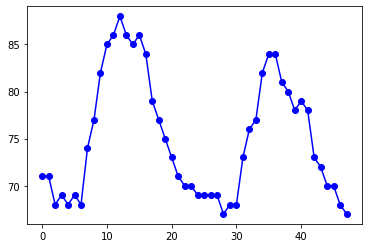

In [24]:
import matplotlib.pyplot as plt 
plt.ion() 
temps = [ 71, 71, 68, 69, 68, 69, 68, 74, 77, 82, 85, 86, 88, 86, 85, 86, 84, 79, 77, 75, 73, 71, 70, 70, 69, 69, 69, 69, 67, 68, 68, 73, 76, 77, 82, 84, 84, 81, 80, 78, 79, 78, 73, 72, 70, 70, 68, 67 ]
plt.plot(temps, '-bo') # "-bo" is an option that indicates plotting with line (-) with a circle marker (o) in blue (b)
plt.show()

## 1.2 Vector addition

#### Vector addition and subtraction

Two vectors of the same size can be added together or subtracted one from the other. *(VMLS, p.11)*

If *x* and *y* are numpy arrays **of the same size**, *x + y* and *x - y* provide the sum and difference. *(VMLS Companion, p. 10)*

In [25]:
#import numpy as np
x = np.array([1,2,3]) 
y = np.array([100,200,300]) 
print('Sum of arrays:', x+y)
print('Difference of arrays:', x-y)

Sum of arrays: [101 202 303]
Difference of arrays: [ -99 -198 -297]


## 1.3 Scalar-vector multiplication

#### Scalar-vector multipliction and division

Scalar-vector multiplication is accompliished by multiplying all elements in a vector by a scalar (i.e. another number). Division is the same way. *(VMLS, p. 15)*

In [26]:
# Multiplication
x = np.array([2, 5, 10])
print(x*2)

#Division -- Remember that integer division, if both num and den are integers, will return an integer as well.
print(x/2)

[ 4 10 20]
[1.  2.5 5. ]


#### Scalar-vector addition

We can add a scalar to each element in an array, but keep in mind that this is *not* standard mathematical notation. *(VMLS, p.16)*

In Python, we would write this as *(x + a)*, where *a* is a scalar but standard notation would be *x + a**1***, as we are multiplying a ones vector by the scalar and then adding each to the original vector. 

*(VMLS Companion, p.11)*

In [27]:
x = np.array([1,2,3,4]) 
print(x + 2)

[3 4 5 6]


#### Elementwise Operations

For arrays of the same size, we can perform the expressions *x * y*, *x / y*, and *x**y* to produce vectors of the same length. *(VMLS Companion, p.11-12)*

In [28]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

print(x * y)
print(x / y)
print(x **y)

[ 2  8 18 32 50]
[0.5 0.5 0.5 0.5 0.5]
[      1      16     729   65536 9765625]


#### Linear Combination

A linear combination of vectors multiplied by their scalars yields a ***linear combination*** of those vectors. *(VMLS, p.17)*

Notice that multiplication by scalars occurs first before the addition of the vectors.

In [29]:
a = np.array([1,2]) 
b = np.array([3,4]) 
alpha = -0.5 
beta = 1.5 
c = alpha*a + beta*b
print(c)

[4. 5.]


The VMLS Python Companion also details a function that easily calculates a linear combination when offered a list of coefficients and a list of vectors as input:

*(VMLS Companion, p.12-13)*

In [30]:
def lincomb(coef, vectors): 
    n = len(vectors[0]) 
    comb = np.zeros(n) 
    for i in range(len(vectors)): 
        comb = comb + coef[i] * vectors[i]
    return comb

a = np.array([1,2]) 
b = np.array([3,4]) 
alpha = -0.5 
beta = 1.5 

coeffs = np.array([alpha, beta]) # turn these into lists for the linear combination
vector = np.array([a, b])

lincomb(coeffs, vector)

array([4., 5.])

###### Extra

The **lincomb**  can also be defined using a list comprehenion *(VMLS Companion, p. 13)*

In [31]:
def lincomb(coef, vectors): 
    return sum(coef[i]*vectors[i] for i in range(len(vectors)))

#### Checking properties

Due to the nature of round-off error when calculating with floating point values, it's important that we understand how the distributive property works. *(VMLS Companion, p.13)*

We can use the **lincomb** function defined above to make this check:

Left-hand Side (LHS) = Right-hand Side (RHS)

beta * (a + b) = beta * a + beta * b

In [32]:
a = np.array([1, 3, 5])
b = np.array([2, 4, 6])
beta = np.random.random() 
lhs = beta*(a+b) 
rhs = beta*a + beta*b 
print('a :', a) 
print('b :', b) 
print('beta :', beta)
print('LHS :', lhs)
print('RHS :', rhs, "\n")

print(lhs == rhs)

a : [1 3 5]
b : [2 4 6]
beta : 0.34316697266965934
LHS : [1.02950092 2.40216881 3.7748367 ]
RHS : [1.02950092 2.40216881 3.7748367 ] 

[ True  True  True]


## 1.4 Inner Product

The **inner product** (aka *dot product*) of *n*-vectors *x* and *y* is the sum of the products of corresponding entries. It is denoted as ***xTy***. *(VMLS, p.19)* *(VMLS Companion, p.14)*

NumPy has a function that determines the inner product of two arrays of the same size: **inner()**.

In [33]:
x = np.array([-1,2,2]) 
y = np.array([1,0,-3])

# (-1)(1) + (2)(0) + (2)(-3) = -7

print(np.inner(x,y))

-7


Alternatively, the 'at' **@** operator can be used to perform the inner product on NumPy arrays. (VMLS Companion, p.14)*

In [34]:
x @ y

-7

#### Net present value

The **net present value (NPV)** is defined as the discounted total of cash flow with an interest rate. *(VMLS p. 22)*

Code source: *(VMLS Companion, p. 14)*

In [35]:
c = np.array([0.1,0.1,0.1,1.1]) #cash flow vector 
n = len(c) 
r = 0.05 #5% per-period interest rate 
d = np.array([(1+r)**-i for i in range(n)]) # raise the scalar 1=r element-wise to the powers given in range(n) (0, 1, 2, ..., n-1).
                                            # This is a list comprehension
NPV = c @ d
print(NPV)

1.236162401468524


#### Total school-age population

The companion details an example of a 100-vector that gives the age distribution of a town of ages between 0-99. *(VMLS Companion, p. 14-15)*

If we wanted to find the number of individuals between the ages of 5-18 (inclusive), we can find the dot product of those elements in the age vector indicating that range using another **stacked block vector** vector of zeroes and ones: ones indicating the number of ages within our range and zeros of those we do not want to compute.


In [37]:
s = np.concatenate([np.zeros(5), np.ones(14), np.zeros(81)]) # Here, we design a sparse array that picks out the range of ages between 5-18 by zeroing out ages 0-4 
                                                             # (using the first 5 indices) as well as ages 19 through to the end of the array
x = None # x would ideally be an array of the population metrics that tracks the number of people of each age (the 0th index would be all newborns, the 18th index all 18 year olds, etc.)
#school_age_pop = s @ x  

# once we had our data and our block vector of 0's and 1's, we could calculate the total number of people in a population that are in K-12 by finding the dot product of the population data with the stacked vector "s"